# Diamond Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Diamonds.csv")
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### 
carat: The weight of the diamond, typically measured in carats. Carat weight is one of the factors that influence a diamond's value, with larger diamonds generally being more valuable.

cut: The quality of the diamond's cut, which refers to how well the diamond's facets interact with light. Common categories for diamond cuts include "Fair," "Good," "Very Good," "Premium," and "Ideal."

color: The color grade of the diamond, indicating the absence of color or the presence of yellow or brown hues. Color grades typically range from "D" (colorless) to "Z" (light yellow or brown).

clarity: The clarity grade of the diamond, which assesses the presence of internal and external imperfections (inclusions and blemishes). Common clarity grades include "FL" (Flawless), "IF" (Internally Flawless), "VVS" (Very Very Slightly Included), "VS" (Very Slightly Included), "SI" (Slightly Included), and "I" (Included).

depth: The depth percentage of the diamond, representing the height of the diamond as a percentage of its average diameter. It's calculated as (z / mean(x, y)) * 100. Depth affects the brilliance and fire of a diamond.

table: The table percentage of the diamond, representing the width of the diamond's table facet as a percentage of the diameter of the diamond. It's calculated as (table / mean(x, y)) * 100.

price: The price of the diamond, typically measured in a currency (e.g., USD). This is the target variable you might want to predict using other features.

x: The length of the diamond in millimeters.

y: The width of the diamond in millimeters.

z: The depth of the diamond in millimeters.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Find Unique Values of Columns who as Datatype as Object

In [5]:
color=data['color'].unique()
cut=data['cut'].unique()
clarity=data['clarity'].unique()
print(color,cut,clarity)

['E' 'I' 'J' 'H' 'F' 'G' 'D'] ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair'] ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Find Null values in Dataset

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Visualization

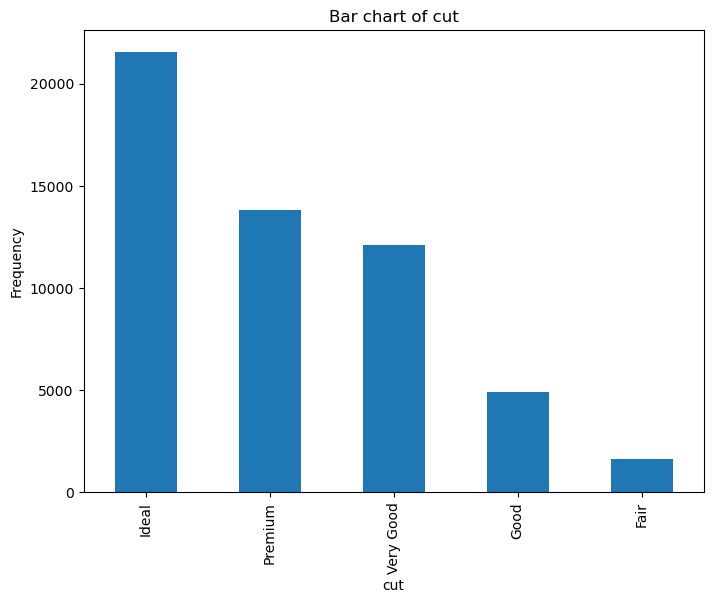

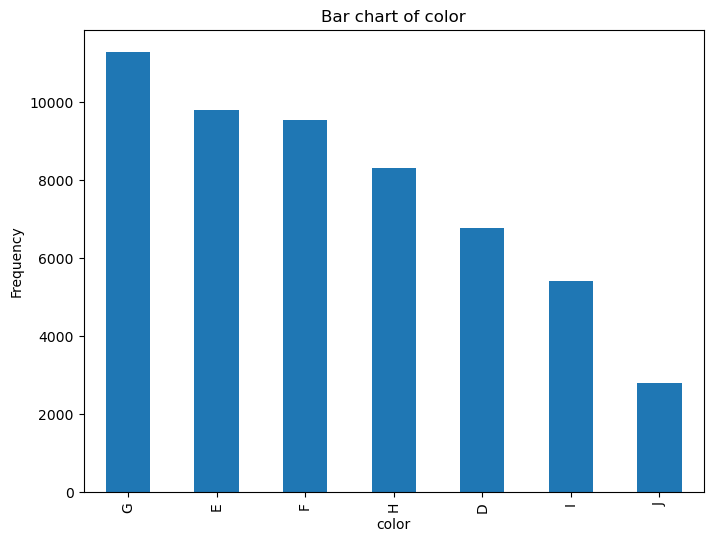

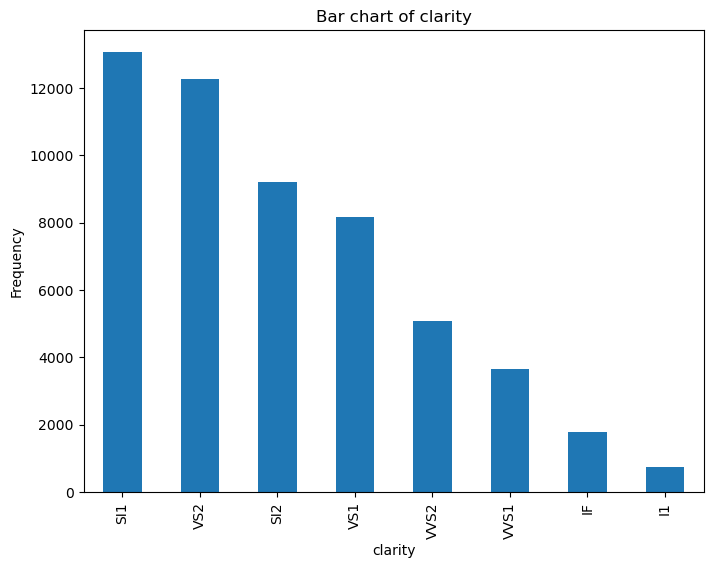

In [7]:
# Plot bar charts for categorical variables
categorical_variables = ['cut', 'color', 'clarity']
for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    data[var].value_counts().plot(kind='bar')
    plt.title(f'Bar chart of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

### Pie Charts

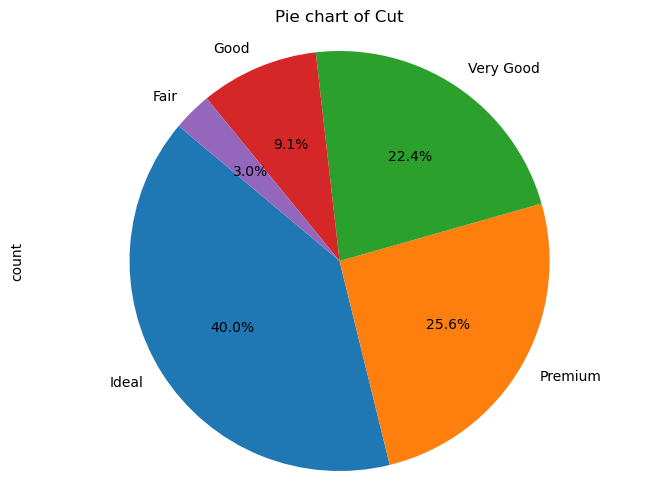

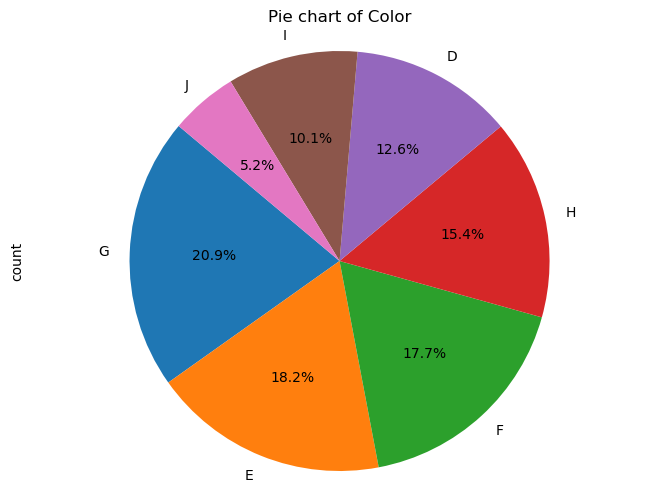

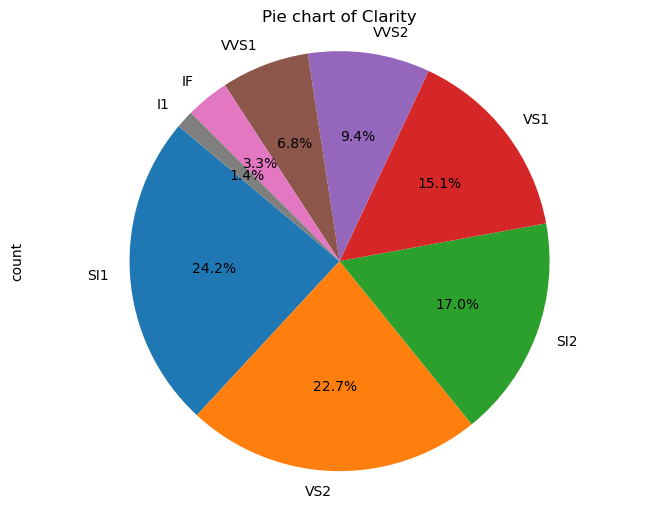

In [8]:
categorical_variables = ['cut', 'color', 'clarity']

for var in categorical_variables:
    plt.figure(figsize=(8, 6))
    data[var].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie chart of {var.capitalize()}')
    plt.axis('equal')
    plt.show()

### Change the Datatypes From Object to Int

In [9]:
le = LabelEncoder()

# Encode categorical variables
data['cut'] = le.fit_transform(data['cut'])
data['color'] = le.fit_transform(data['color'])
data['clarity'] = le.fit_transform(data['clarity'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


In [11]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


## Split the Data (Features & Target)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Assuming df is your DataFrame with features (X) and target variable (y)

# Define features (X) and target variable (y)
X = data.drop(columns=['price'])  # Assuming 'price' is your target variable
y = data['price']
r2_scores = {}
print(X)
print(y)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0  5.83  5.87  3.64

[53940 rows x 9 columns]
0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, 

### Split Feature and Target into Training & Testing sets

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [17]:
# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [18]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

In [19]:
#Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

In [20]:
#Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [21]:
#Calculate R^2 score
r2 = r2_score(y_test, y_pred)

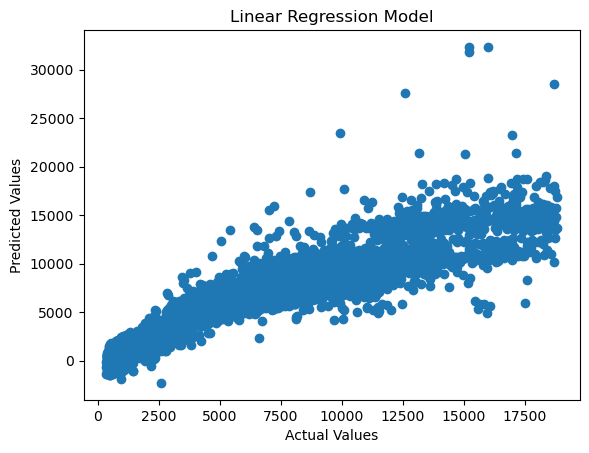

In [22]:
# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

In [23]:
print("Linear Regression Model's MAE:", mae)
print("Linear Regression Model's MSE:", mse)
print("Linear Regression Model's RMSE:", rmse)
print("Linear Regression Model's R-squared:",round(r2*100,2),"%")

Linear Regression Model's MAE: 858.7084697710088
Linear Regression Model's MSE: 1825912.9915253466
Linear Regression Model's RMSE: 1351.2634796831248
Linear Regression Model's R-squared: 88.51 %


In [24]:
# calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {round(r2*100,2)}%')

R-squared: 88.51%


In [25]:
# Print the first few predictions and actual values for linear Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

       Actual     Predicted
1388      559    363.646688
50052    2201   3355.932308
41645    1238   2139.566064
42377    1304   2371.644610
17244    6901  10551.699188


## K-Nearest Neighbor

In [26]:
# Create a KNN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=3)  

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

In [27]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
# Print metrics
print(f"K-Nearest Neighbor's Mean Absolute Error: {mae}")
print(f"K-Nearest Neighbor's Mean Squared Error: {mse}")
print(f"K-Nearest Neighbor's R-squared: {round(r2*100,2)}%")

K-Nearest Neighbor's Mean Absolute Error: 488.3972932888395
K-Nearest Neighbor's Mean Squared Error: 832589.8857166398
K-Nearest Neighbor's R-squared: 94.76%


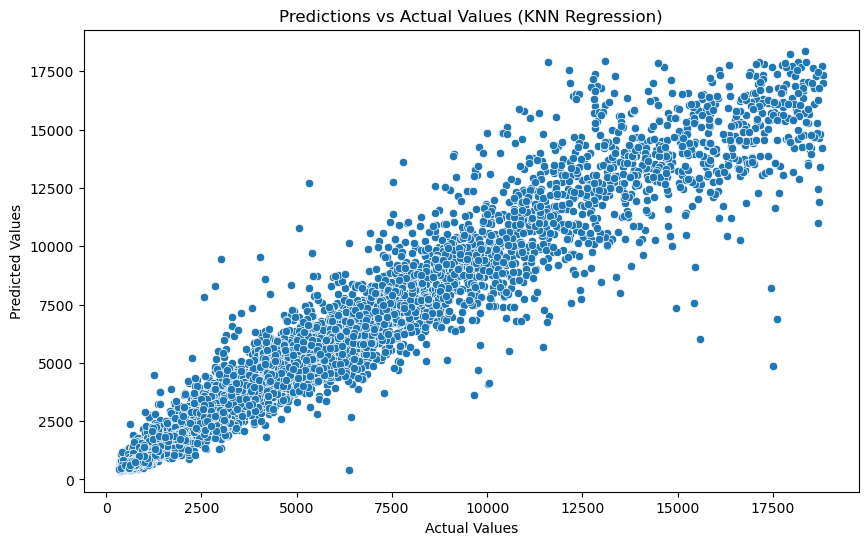

In [29]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predictions vs Actual Values (KNN Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [30]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print(f'R-squared: {round(r2*100,2)}%')

 Mean Squared Error (MSE): 832589.8857166398
Mean Absolute Error (MAE): 488.3972932888395
R-squared: 94.76%


In [31]:
# Print the first few predictions and actual values for KNN Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

       Actual    Predicted
1388      559   559.000000
50052    2201  2384.666667
41645    1238  1116.333333
42377    1304  1011.333333
17244    6901  8947.333333


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [33]:
# Create and train the Decision Tree Regressor model
regression_model = DecisionTreeRegressor(random_state=42)
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

In [34]:
# Evaluate the model
mse =  mean_squared_error(y_test, y_pred)
print("Decision Tree's Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print(f"Decision Tree's Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred)
print("Decision Tree's R-squared:", round(r2*100,2),"%")

Decision Tree's Mean Squared Error: 531489.9365498702
Decision Tree's Mean Absolute Error: 355.6442343344457
Decision Tree's R-squared: 96.66 %


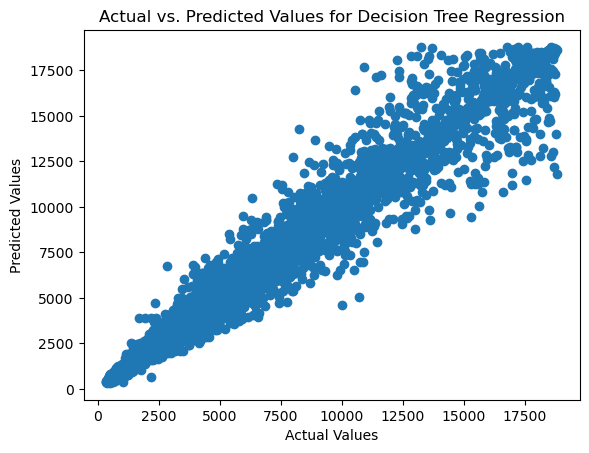

In [35]:
# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Decision Tree Regression")
plt.show()

In [36]:
# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {round(r2*100,2)}%')

Mean Squared Error: 531489.9365498702
Mean Squared Error: 531489.9365498702
R-squared: 96.66%


In [37]:
# Print the first few predictions and actual values for DECISION TREE Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

       Actual  Predicted
1388      559      554.0
50052    2201     2321.0
41645    1238     1238.0
42377    1304     1291.0
17244    6901     9302.0


## Random Forest Regressor model

In [38]:
# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

In [39]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Random Forest Regressor model's Mean Absolute Error: {mae}")
print(f"Random Forest Regressor model's Mean Squared Error: {mse}")
print(f"Random Forest Regressor model's R-squared: {r2}")

Random Forest Regressor model's Mean Absolute Error: 268.6148377109928
Random Forest Regressor model's Mean Squared Error: 294701.4491740043
Random Forest Regressor model's R-squared: 0.981461611676424


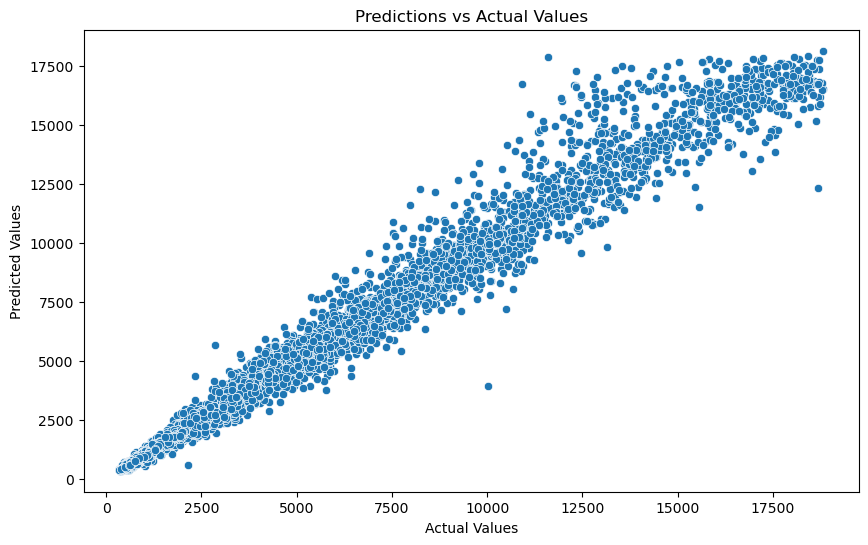

In [40]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [41]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {round(r2*100,2)}%')

R-squared: 0.981461611676424
Mean Squared Error: 294701.4491740043
Mean Squared Error: 294701.4491740043
R-squared: 98.15%


In [42]:
# Print the first few predictions and actual values for Random Forest Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

       Actual  Predicted
1388      559     555.44
50052    2201    2381.32
41645    1238    1216.24
42377    1304    1229.17
17244    6901    9560.84


### 
R2 Scores are :
Linear Regression: 0.8851397433679632
K-nearest neighbor: 0.9476253861019073
Decision Tree: 0.9665662762723075
Random Forest model: 0.9815166021393334